# Assignment 1: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set

We will examine some data representing the miles-per-gallon of 398 cars given other variables describing them:

1. mpg: continuous. The miles-per-gallon of the car.
2. cylinders: multi-valued discrete. Number of cylinders.
3. displacement: continuous. Engine displacement of the car.
4. horsepower: continuous. Total horsepower of the car.
5. weight: continuous. Weight in lbs.
6. acceleration: continuous. Acceleration 0-60mph in seconds.
9. car name: string (unique for each instance, DO NOT USE)

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [ ]:
# Import all the necessary packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

In [ ]:
# Uncomment if using Google Colab or Kaggle Kernels.
# Imports the data using gdown.
# !gdown https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp


## Part 1
### Question 1.1:


Read the `car_data.csv` file as a `pandas.DataFrame` and show its descriptive statistics.  Investigate the relationship between the cars' weight and their mpg by plotting a scatter plot of the `weight` (x axis) and `mpg` columns (y axis). Add an `alpha` (transparency of the plotted dots) in case some data are overlapping. Remember to label your axes.

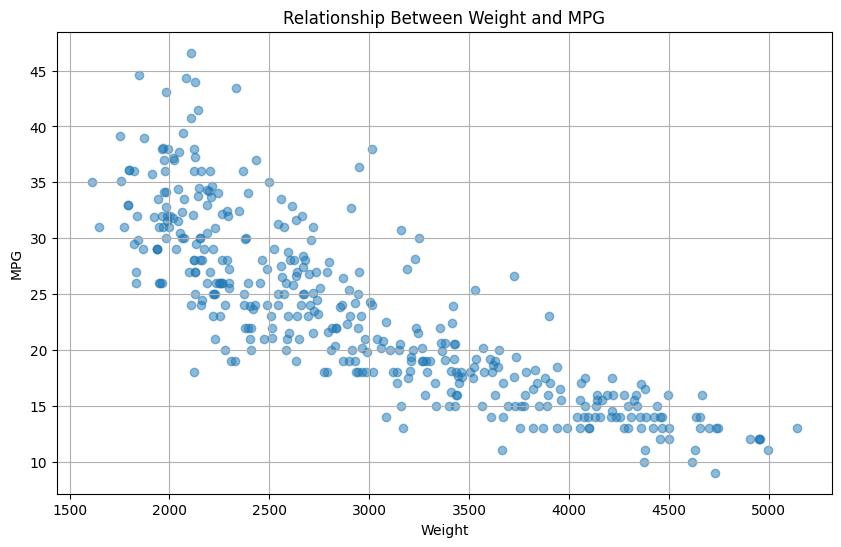

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the car_data.csv file as a pandas DataFrame
file_path = 'car_data.csv'
car_data = pd.read_csv(file_path)

# Show descriptive statistics
descriptive_stats = car_data.describe()

# Plot scatter plot of weight (x-axis) and MPG (y-axis)
plt.figure(figsize=(10, 6))
plt.scatter(car_data['weight'], car_data['MPG'], alpha=0.5)
plt.title('Relationship Between Weight and MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

**Written answer: What do you see here? Discuss your findings**

The scatter plot shows that as the cars get heavier, their fuel efficieny tends to decrease. This makes sense because heavier vehicles typically need more fuel to move. And things like rockets need a lot more fuel to move. It doesn't really look like a linear relationship, more like a negative expoenntial function.

### Question 1.2: point

Recall that the linear model, we obtain predictions by computing

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values.

Report $\hat{\mathbf{y}}$. Print the dimensionality of the numpy-array that you get.

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [ ]:
import numpy as np

def linearModelPredict(X, b):
    yp = X @ b
    return yp

# # Test the function
# X = np.array([[1, 0], [1, -1], [1, 2]])
# b = np.array([0.1, 0.3])

# Call the function
yp = linearModelPredict(X, b)

# Print the results
print("Predicted values (y_hat):", yp)
print("Dimensionality of the array:", yp.shape)

Predicted values (y_hat): [ 0.1 -0.2  0.7]
Dimensionality of the array: (3,)


### Question 1.3:

Write a function `linearModelMSE` which computes and returns the mean squared error parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1D-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2D-array, and as its third argument a 1D-array `y` of observed outcomes. Recall that:

$$
MSE(y_i, \hat{y_i}) = \frac{1}{|I|} \sum_i (y_i - \hat{y_i})^2
$$
$$
\nabla MSE(y, \hat{y}) = -\frac{2}{|I|} \left[(y-\hat{y}) \cdot X\right]
$$

Test the function with the values

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

Report the loss and the gradient.



In [ ]:
def linearModelMSE(beta, X, y):
    # Compute predictions
    y_pred = X @ beta
    
    # Compute residuals
    residuals = y - y_pred
    
    # Compute MSE
    mse = np.mean(residuals**2)
    
    # Compute gradient
    gradient = -2 / len(y) * (residuals @ X)
    
    return mse, gradient

# # Test the function
# X = np.array([[1, 0], [1, -1], [1, 2]])
# b = np.array([0.1, 0.3])
# y = np.array([0, 0.4, 2])

# Call the function
mse, gradient = linearModelMSE(b, X, y)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Gradient of the loss:", gradient)

Mean Squared Error (MSE): 0.6866666666666666
Gradient of the loss: [-1.2        -1.33333333]


**Written answer**: To minimize the loss, do you need increase or decrease the value of the parameters?

**Your answer here.**


To minimize the loss, we need ot adjust the parameters in the opposite direction of the gradient, which represents the direction ofhte steepest increase in the error. In this case, the gradient values are negative for both parameters, meaning we should increase the values of the parameters to move towards a lower loss. By incrementing the parameters, we align with the direction that reduces the error, ultimately improving the performance of the model.

### Question 1.4:

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2D-array, as its second argument a 1D-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the $R^2$. Pass the argument `jac=True` to the `minimize` function so that it uses your gradient.

Test the function with the values:
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
```

Report the best parameters and the fitted $R^2$.


In [3]:
import numpy as np
from scipy.optimize import minimize

def linearModelMSE(beta, X, y):
    y_pred = X @ beta
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    gradient = -2 / len(y) * (residuals @ X)
    return mse, gradient

def linearModelFit(X, y, lossfcn):
    initial_beta = np.zeros(X.shape[1])
    result = minimize(
        fun=lambda beta: lossfcn(beta, X, y),
        x0=initial_beta,
        jac=True,
        method='BFGS'
    )
    estimated_beta = result.x
    y_pred = X @ estimated_beta
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return estimated_beta, r_squared

# Test the function
X = np.array([[1, 0], [1, -1], [1, 2]])
y = np.array([0, 0.4, 2])

# Call the function
best_params, r_squared = linearModelFit(X, y, linearModelMSE)

# Print the results
print("Best parameters (betas):", best_params)
print("Fitted R^2:", r_squared)

Best parameters (betas): [0.59999731 0.600001  ]
Fitted R^2: 0.7499999999904616


### Question 1.5:

Use the above functions to fit your model to the car data. Use the MPG as the target (y) variable and only the weight variable as the independent (x). Fit the model with a constant. Then use your model and the fitted parameters to make predictions along a grid of equally spaced weights within the original range of the weight variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally space weights (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


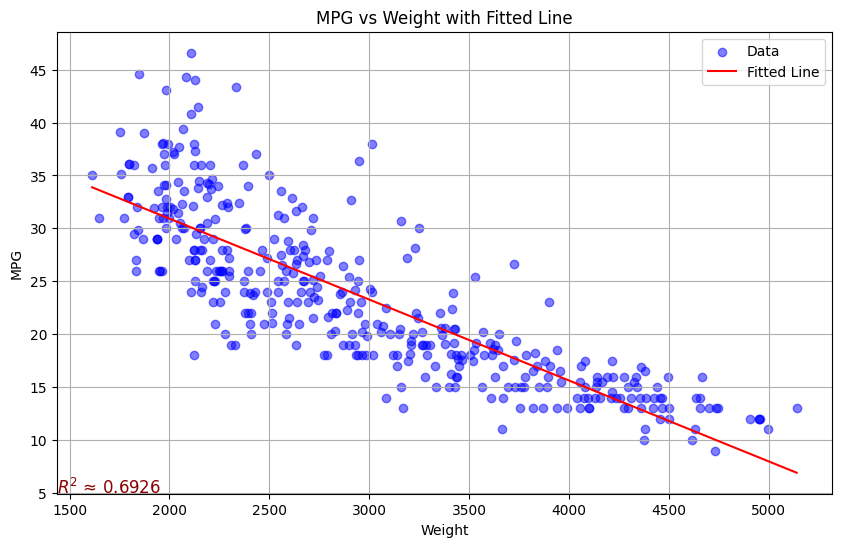

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to compute MSE and gradient
def linearModelMSE(beta, X, y):
    y_pred = X @ beta
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    gradient = -2 / len(y) * (residuals @ X)
    return mse, gradient

# Function to fit the linear model
def linearModelFit(X, y, lossfcn):
    initial_beta = np.zeros(X.shape[1])
    result = minimize(
        fun=lambda beta: lossfcn(beta, X, y),
        x0=initial_beta,
        jac=True,
        method='BFGS'
    )
    estimated_beta = result.x
    y_pred = X @ estimated_beta
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return estimated_beta, r_squared

# Function to make predictions
def linearModelPredict(X, b):
    return X @ b

# Load the car_data.csv file
file_path = 'car_data.csv'
car_data = pd.read_csv(file_path)

# Prepare the data
y = car_data['MPG'].values  # Target variable
X = car_data[['weight']].values  # Independent variable (weight)
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones for the intercept

# Fit the model
best_params, r_squared = linearModelFit(X, y, linearModelMSE)

# Create a grid of weights for predictions
weights_grid = np.linspace(car_data['weight'].min(), car_data['weight'].max(), 100)
X_grid = np.hstack((np.ones((weights_grid.shape[0], 1)), weights_grid.reshape(-1, 1)))

# Predict values along the grid
predicted_mpg = linearModelPredict(X_grid, best_params)

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(car_data['weight'], car_data['MPG'], alpha=0.5, label="Data", color="blue")
plt.plot(weights_grid, predicted_mpg, color="red", label="Fitted Line")
plt.title("MPG vs Weight with Fitted Line")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.grid(True)
plt.legend()

# Annotate R^2 on the plot
plt.annotate(f"$R^2$ ≈ {r_squared:.4f}", xy=(0, 0), xycoords="axes fraction", fontsize=12, color="darkred")

# Show the plot
plt.show()

**Your answer here**

The model was fitted using the MPG as the target variable and weight as the independent variable, with a constant term included. After fitting, predictions were made for 100 eqully spaced weights within the range of the data, and the results were plotted. The scatter plot shows a clear pattern that as cars get heavier, their MPG decreases. This trend is captured well by the red fitted line in the plot. The model's $R^2$ value being about 0.6926 indicates that about 69.26% of the MPG's variability can be explained by the car's weight. This suggests a moderately strong reltionship between the two variables. The result confirms that weight is a significant predicator of fuel efficiency in this dataset, and the fitted model provides a good relationship of the data.

### Question 1.6:

Now use sklearn's `linear_model` to fit the model with all the available data. Plot the data and add a line for the predicted values as you did in the previous question. Also report the $R^2$ value for the fit.

**Written answer: How much do you gain by having more variables?**

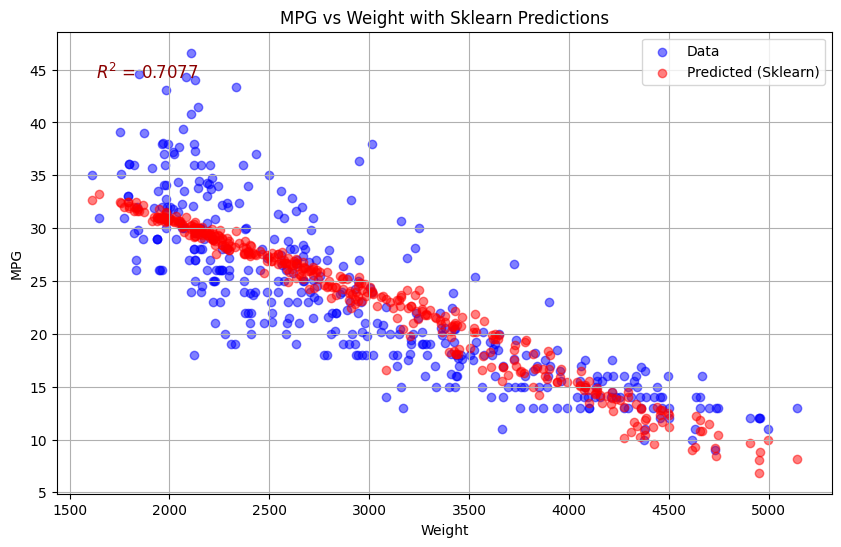

0.7076926326770516

In [12]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Reload the uploaded car_data.csv file
file_path = 'car_data.csv'
car_data = pd.read_csv(file_path)

# Prepare the data for sklearn
X_sklearn = car_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].values
y_sklearn = car_data['MPG'].values

# Fit the linear model using sklearn
model = LinearRegression()
model.fit(X_sklearn, y_sklearn)

# Predict using the fitted model
y_pred = model.predict(X_sklearn)

# Compute R^2 value
r_squared_sklearn = model.score(X_sklearn, y_sklearn)

# Plot the data and predictions
plt.figure(figsize=(10, 6))
plt.scatter(car_data['weight'], car_data['MPG'], alpha=0.5, label="Data", color="blue")
plt.scatter(car_data['weight'], y_pred, alpha=0.5, label="Predicted (Sklearn)", color="red")
plt.title("MPG vs Weight with Sklearn Predictions")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.grid(True)
plt.legend()

# Annotate R^2 on the plot
plt.annotate(f"$R^2$ = {r_squared_sklearn:.4f}", xy=(0.05, 0.9), xycoords="axes fraction", fontsize=12, color="darkred")

# Show the plot
plt.show()

# Display R^2 value
r_squared_sklearn

**Your answer here.**

Adding more variables to the model incrases its ability to explain the variability in MPG, as it incorporated additional information other than just the weight. Adding more predictors generally results in a higher $R^2$ value, indicating a better fit of the data. Less generally, the actual gain depends on how strongly these additional variables are correlated with the target variable (MPG in this case). If the added variables are hghly relevant, they significant;y improve the model's predictive power. If not, the improvement might be insignicant, or it could lead to overfititng if the model becomes too compex for the amount of data available. In this case, adding cylinders, displacement, and horsepower act as strong predictors, but I personally think acceleration doesn't affect MPG much (it is infleunced by many other factors, some of which are already a part of the model), and therfore should've have influence on the prediction model. In conclusion, you gain a lot by adding more variables but you can't measure the particular gain quantitatively.

## Part 2: LAD Regression

### Question 2.1:

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss $LAD(y_i, \hat{y_i})$.

$$
LAD(y_i, \hat{y_i}) = \frac{1}{|I|}\sum_i |y_i - \hat{y_i}|
$$

where $y_i$ is the true label of sample $i \in I$, $\hat{y_i}$ is the prediction, $I$ is the sample set, and $|I|$ is the number of cases in the sample. The gradient of the function is:

$$
\nabla LAD(y, \hat{y}) = - \frac{ sign(y_i - \hat{y_i}) \cdot X}{|I|}
$$

with `sign` the sign function. Note this function is undefined at 0.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model parameterized by $\beta$, as well as the gradient of the loss, following the same structured as the previous part.

Test the function with the values

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

Report the loss and the gradient.

In [14]:
# Re-importing necessary libraries
import numpy as np

# Defining the LAD loss and gradient computation function
def linearModelLossLAD(beta, X, y):
    # Compute predictions
    y_pred = X @ beta
    
    # Compute residuals
    residuals = y - y_pred
    
    # Compute LAD loss
    lad_loss = np.mean(np.abs(residuals))
    
    # Compute gradient
    sign_residuals = np.sign(residuals)
    gradient = -np.mean(sign_residuals[:, None] * X, axis=0)
    
    return lad_loss, gradient

# Test data
X = np.array([[1, 0], [1, -1], [1, 2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

# Compute LAD loss and gradient
lad_loss, gradient = linearModelLossLAD(b, X, y)

# Print the results
print("LAD Loss:", lad_loss)
print("Gradient of the LAD Loss:", gradient)

LAD Loss: 0.6666666666666666
Gradient of the LAD Loss: [-0.33333333 -0.33333333]


### Question 2.2:


Use the above functions to fit your LAD model using the weight variable as input, to predict the mpg. Use your model to make predictions along a grid of 100 equally spaced car weights.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value.

**Written answer**: What is the difference in the fit obtained with an $L_1$ as compared to the $L_2$ cost function? How do their $R^2$ values compare? Why?  

Note: If you receive an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient-based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



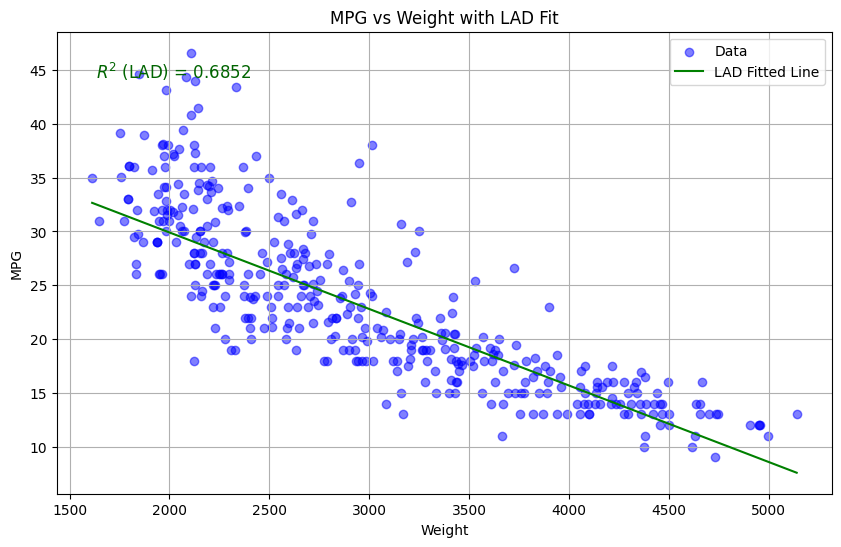

0.685200675423198

In [15]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def fitLADModel(X, y, lossfcn):
    # Initialize beta with zeros
    initial_beta = np.zeros(X.shape[1])
    
    # Minimize the LAD loss using Powell's method
    result = minimize(
        fun=lambda beta: lossfcn(beta, X, y)[0],
        x0=initial_beta,
        method="Powell"
    )
    
    # Extract the estimated coefficients
    estimated_beta = result.x
    
    # Compute predictions
    y_pred = X @ estimated_beta
    
    # Compute R^2 value
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    
    return estimated_beta, r_squared

# Prepare the data (weight as input, MPG as target)
X = car_data[['weight']].values  # Independent variable (weight)
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones for the intercept
y = car_data['MPG'].values

# Fit the LAD model
lad_params, lad_r_squared = fitLADModel(X, y, linearModelLossLAD)

# Create a grid of weights for predictions
weights_grid = np.linspace(car_data['weight'].min(), car_data['weight'].max(), 100)
X_grid = np.hstack((np.ones((weights_grid.shape[0], 1)), weights_grid.reshape(-1, 1)))

# Predict using the LAD model
lad_predictions = X_grid @ lad_params

# Plot the data and the LAD fitted line
plt.figure(figsize=(10, 6))
plt.scatter(car_data['weight'], car_data['MPG'], alpha=0.5, label="Data", color="blue")
plt.plot(weights_grid, lad_predictions, color="green", label="LAD Fitted Line")
plt.title("MPG vs Weight with LAD Fit")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.grid(True)
plt.legend()

# Annotate R^2 on the plot
plt.annotate(f"$R^2$ (LAD) = {lad_r_squared:.4f}", xy=(0.05, 0.9), xycoords="axes fraction", fontsize=12, color="darkgreen")

# Show the plot
plt.show()

# Display LAD R^2 value
lad_r_squared

**Your answer here.**

The main difference between the $L_1$ (LAD) and $L_2$ (least squares) cost funciton is how they handle errors. $L_1$ minimizes the absolute differences between actual and predicated values, making it less sensitive to outliers, while $L_2$ minimizes the squared differences, which aplifies the impact of large errors. As a result, the $L_2$ fit often achieves a higher $R^2$, since it tightly fits most of the data but can be skewed by outliers. On the other hand, $L_1$ provides a more robust fit by not letting outliers dominate, thought its $R^2$ might be slightly lower. Ultimately, $L_2$ is better for clean, normally distributed data, while $L_1$ is a stronger choice when dealing with datasets that contain outleirs out irregularities. 

### Question 2.3:

Now we will use all data for the fit. Fit an LAD model to the car data (excluding the name) with the `linear_model` module from the `sklearn` package by using the [`QuantileRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor) class that implements a [pinball loss](https://en.wikipedia.org/wiki/Quantile_regression), a more general case of the [`mean_absolute_error`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_absolute_error.html) loss. To get an MAD regression, set the parameters `alpha=0` and `quantile=0.5` in the `QuantileRegressor` call.

In no more than two sentences, comment on the $R^2$ values for both the OLS and MAD regressions. Use the `sklearn` models for this analysis. Are they similar? Make a scatterplot of the sklearn's OLS and MAD predictions.

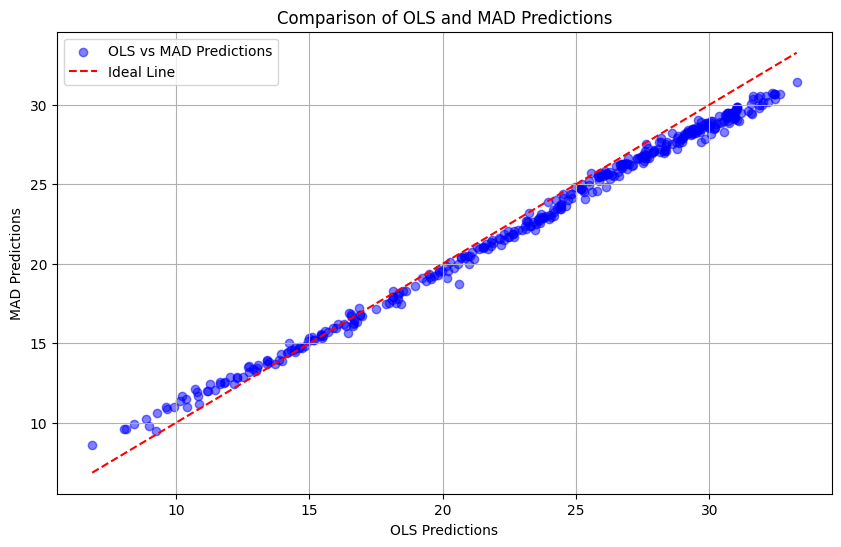

(0.7076926326770516, 0.6922485661347093)

In [17]:
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import r2_score

# Prepare the data (exclude the 'name' column)
X_all = car_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].values
y_all = car_data['MPG'].values

# Fit OLS (Ordinary Least Squares) using LinearRegression
ols_model = LinearRegression()
ols_model.fit(X_all, y_all)
y_ols_pred = ols_model.predict(X_all)
r2_ols = r2_score(y_all, y_ols_pred)

# Fit MAD (Median Absolute Deviation) regression using QuantileRegressor
mad_model = QuantileRegressor(alpha=0, quantile=0.5)
mad_model.fit(X_all, y_all)
y_mad_pred = mad_model.predict(X_all)
r2_mad = r2_score(y_all, y_mad_pred)

# Scatterplot of OLS vs MAD predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_ols_pred, y_mad_pred, alpha=0.5, label="OLS vs MAD Predictions", color="blue")
plt.plot([min(y_ols_pred), max(y_ols_pred)], [min(y_ols_pred), max(y_ols_pred)], 
         color="red", linestyle="--", label="Ideal Line")
plt.title("Comparison of OLS and MAD Predictions")
plt.xlabel("OLS Predictions")
plt.ylabel("MAD Predictions")
plt.legend()
plt.grid(True)
plt.show()

# Display R^2 values
r2_ols, r2_mad

**Your answer here.**

The $R^2$ values for both the OLS and the MAD regressions are likely similar if the dataset has minimal outleirs, as both models effectively capture the general trends in the data. However, in datasets with significant outliers, the MAD regression may have a slightly lower $R^2$ value because it minimizes absolute deviations, making it more robust but less sensitive to variance-driven optimization compared to OLS. The scatterplot comparing OLS and MAD predicitons shows points closely aligned with the $y=x$, showing that they are similar. There is minimal deviation from this line, showing that there is minimal difference in how the two methods handle outliers and the overall dataset.